## Exercici 1
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#%% Functions

def dateGroup(df):
     df.insert(0, 'Date', pd.to_datetime( df['Year']*10000 + 
                                          df['Month']*100 + 
                                          df['DayofMonth'],
                                          format = '%Y%m%d'))

In [2]:
df = pd.read_csv('DelayedFlights.csv')

First, brief overview of the first rows

In [3]:
print(df.head())
print(df.shape)

   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN         

Grouping the date allows us to delete some columns. Setting this as a function, ensures reusability, which seems will
go a looooong way in the future. Notice the dataframe behaves as a global variable :S

In [4]:
dateGroup(df)
print(df.iloc[0]) #show first row

Date                 2008-01-03 00:00:00
Unnamed: 0                             0
Year                                2008
Month                                  1
DayofMonth                             3
DayOfWeek                              4
DepTime                           2003.0
CRSDepTime                          1955
ArrTime                           2211.0
CRSArrTime                          2225
UniqueCarrier                         WN
FlightNum                            335
TailNum                           N712SW
ActualElapsedTime                  128.0
CRSElapsedTime                     150.0
AirTime                            116.0
ArrDelay                           -14.0
DepDelay                             8.0
Origin                               IAD
Dest                                 TPA
Distance                             810
TaxiIn                               4.0
TaxiOut                              8.0
Cancelled                              0
CancellationCode

Deleting some columns that may not be of interest, by creating a list of labels.

In [5]:
valuesToDrop = ['Year', 'Month', 'DayofMonth', 'DayOfWeek',
                    'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
                    'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime',
                    'DepDelay','TaxiIn', 'TaxiOut', 'Unnamed: 0',
                    'CancellationCode', 'TailNum', 'Dest', 'Origin']
df.drop(valuesToDrop, inplace = True, axis = 1)
print(df.head())

        Date UniqueCarrier  AirTime  ArrDelay  Distance  Cancelled  Diverted  \
0 2008-01-03            WN    116.0     -14.0       810          0         0   
1 2008-01-03            WN    113.0       2.0       810          0         0   
2 2008-01-03            WN     76.0      14.0       515          0         0   
3 2008-01-03            WN     77.0      34.0       515          0         0   
4 2008-01-03            WN     87.0      11.0       688          0         0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0           NaN           NaN       NaN            NaN                NaN  
1           NaN           NaN       NaN            NaN                NaN  
2           NaN           NaN       NaN            NaN                NaN  
3           2.0           0.0       0.0            0.0               32.0  
4           NaN           NaN       NaN            NaN                NaN  


## Exercici 2


Fes un informe complet del data set:.

   - Resumeix estadísticament les columnes d’interès
   - Troba quantes dades faltants hi ha per columna
   - Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
   - Taula de les aerolínies amb més endarreriments acumulats
   - Quins són els vols més llargs? I els més endarrerits?
   - Etc.


First, we count the missing data, stored as Nan values:

In [6]:
print(df.isna().sum())

Date                      0
UniqueCarrier             0
AirTime                8387
ArrDelay               8387
Distance                  0
Cancelled                 0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


Let's assume some of this missing data comes from cancelled and diverted flights,  
which may be of interest when performing some other analysis, but right now,  
as we are learning, let's drop these kind of flights.
Cancelled and diverted flights are noted with 0-1.

In [7]:
nonCancelled = df['Cancelled'] == 0
nonDiverted = df['Diverted'] == 0

df = df[nonCancelled & nonDiverted]

print(df.isna().sum())

df.drop(['Cancelled', 'Diverted'], inplace = True, axis = 1)

print(df.head())

Date                      0
UniqueCarrier             0
AirTime                   0
ArrDelay                  0
Distance                  0
Cancelled                 0
Diverted                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64
        Date UniqueCarrier  AirTime  ArrDelay  Distance  CarrierDelay  \
0 2008-01-03            WN    116.0     -14.0       810           NaN   
1 2008-01-03            WN    113.0       2.0       810           NaN   
2 2008-01-03            WN     76.0      14.0       515           NaN   
3 2008-01-03            WN     77.0      34.0       515           2.0   
4 2008-01-03            WN     87.0      11.0       688           NaN   

   WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0           NaN       NaN            NaN                NaN  
1           NaN       NaN            NaN                NaN  
2           NaN       NaN 

Now that we have the flights we are interested in, it's reasonable to change the remaining missing data to 0.

In [8]:
#This is the cleanest way I could find
df.fillna({'CarrierDelay':0, 'WeatherDelay':0, 'NASDelay':0, 'SecurityDelay':0, 'LateAircraftDelay':0}, inplace = True)
print(df.head())

        Date UniqueCarrier  AirTime  ArrDelay  Distance  CarrierDelay  \
0 2008-01-03            WN    116.0     -14.0       810           0.0   
1 2008-01-03            WN    113.0       2.0       810           0.0   
2 2008-01-03            WN     76.0      14.0       515           0.0   
3 2008-01-03            WN     77.0      34.0       515           2.0   
4 2008-01-03            WN     87.0      11.0       688           0.0   

   WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0           0.0       0.0            0.0                0.0  
1           0.0       0.0            0.0                0.0  
2           0.0       0.0            0.0                0.0  
3           0.0       0.0            0.0               32.0  
4           0.0       0.0            0.0                0.0  


Finally, we have a dataset we can operate without all the unnecessary weigth, let's look at the type of data in each column

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 1936757
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   UniqueCarrier      object        
 2   AirTime            float64       
 3   ArrDelay           float64       
 4   Distance           int64         
 5   CarrierDelay       float64       
 6   WeatherDelay       float64       
 7   NASDelay           float64       
 8   SecurityDelay      float64       
 9   LateAircraftDelay  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 161.8+ MB
None


We notice the UniqueCarrier column with the datatype object that can be changed to string. This is useful if we want to compare them with other strings or simply use them in a plot as label.

In [10]:
df = df.astype({'UniqueCarrier' : 'string'})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 1936757
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   UniqueCarrier      string        
 2   AirTime            float64       
 3   ArrDelay           float64       
 4   Distance           int64         
 5   CarrierDelay       float64       
 6   WeatherDelay       float64       
 7   NASDelay           float64       
 8   SecurityDelay      float64       
 9   LateAircraftDelay  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), string(1)
memory usage: 161.8 MB
None


Now that we have the trimmed dataset, let's add some columns, such as flight speed. Since speed will be defined as distance/airtime, we'll have to drop any values that are 0 for either column. First we need to explore the possibility and assess if the volume of data to be discarded is significant to the sample.

In [11]:
zeroDistance = df['Distance'] == 0
print(zeroDistance.sum())

zeroTime = df['AirTime'] == 0
print(zeroTime.sum())

0
7


There are 0 zeroDistance flights, as expected. However, we have 7 zeroTime. This means we have flights that weren't cancelled nor diverted, yet were accounted with 0 AirTime. This could be an error when collecting the data, or an error during processing. More precisely, the fact of dropping columns before analizing the na values can lead to this kind of situations. Fortunately for us, we can get rid of this 7 values since we have a data sample of almost 2 million flights. Only then can we proceed to create the speed column.

In [12]:
nonZeroTime = df['AirTime'] != 0
df = df[nonZeroTime]
zeroTime = df['AirTime'] == 0
print(zeroTime.sum())

df.insert(3, 'Speed', df['Distance']/df['AirTime'])
print(df.head())

0
        Date UniqueCarrier  AirTime     Speed  ArrDelay  Distance  \
0 2008-01-03            WN    116.0  6.982759     -14.0       810   
1 2008-01-03            WN    113.0  7.168142       2.0       810   
2 2008-01-03            WN     76.0  6.776316      14.0       515   
3 2008-01-03            WN     77.0  6.688312      34.0       515   
4 2008-01-03            WN     87.0  7.908046      11.0       688   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0           0.0           0.0       0.0            0.0                0.0  
1           0.0           0.0       0.0            0.0                0.0  
2           0.0           0.0       0.0            0.0                0.0  
3           2.0           0.0       0.0            0.0               32.0  
4           0.0           0.0       0.0            0.0                0.0  


Finally, the last edit would be to change the negative and below 15 minutes ArrDelay to 0 (the dataset considers delays of less than 15 minutes, no delay at all), and drop ArrDelay

In [13]:
print(df['ArrDelay'].max())

2461.0


In [14]:
df.insert(4,'DelayedMinutes', np.abs((df['ArrDelay'] > 15) * df['ArrDelay']))
df.drop('ArrDelay', inplace = True, axis = 1)
print(df.head())

        Date UniqueCarrier  AirTime     Speed  DelayedMinutes  Distance  \
0 2008-01-03            WN    116.0  6.982759             0.0       810   
1 2008-01-03            WN    113.0  7.168142             0.0       810   
2 2008-01-03            WN     76.0  6.776316             0.0       515   
3 2008-01-03            WN     77.0  6.688312            34.0       515   
4 2008-01-03            WN     87.0  7.908046             0.0       688   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0           0.0           0.0       0.0            0.0                0.0  
1           0.0           0.0       0.0            0.0                0.0  
2           0.0           0.0       0.0            0.0                0.0  
3           2.0           0.0       0.0            0.0               32.0  
4           0.0           0.0       0.0            0.0                0.0  


Finally, we have the ideal dataframe, no useless columns, no missing data and data types we can operate on. Let's do this:
### Statistical summary of all flights

In [15]:
def boxplotGrid(data, axs):
    
    labels = list(data.columns)
    flatAxs = axs.flatten() 
    
    for label in labels:   
        ax = flatAxs[labels.index(label)]
        ax.boxplot(data[label])
        
        q1 = data[label].quantile(0.25)
        q3 = data[label].quantile(0.75)
        iqr = q3 - q1
        
        ymax = q3 + 2*iqr
        ymin = q1 - 2*iqr
        ax.set_ylim(ymin, ymax)
        ax.set_title(label)
        ax.set_xticklabels([])
        ax.set_xticks([])
        
        if ('Delay' or 'Time') in label:
            ax.set_ylabel(label + '(min)')
        
        elif label == 'Distance':
            ax.set_ylabel(label + '(km)')
        
        else:
            ax.set_ylabel(label + '(km/min)')

            AirTime         Speed  DelayedMinutes      Distance  CarrierDelay  \
count  1.928364e+06  1.928364e+06    1.928364e+06  1.928364e+06  1.928364e+06   
mean   1.082775e+02  6.615878e+00    4.069115e+01  7.649496e+02  1.240744e+01   
std    6.864242e+01  1.625243e+00    5.761602e+01  5.738861e+02  3.620428e+01   
min    1.000000e+00  3.548387e-01    0.000000e+00  1.100000e+01  0.000000e+00   
25%    5.800000e+01  5.864407e+00    0.000000e+00  3.380000e+02  0.000000e+00   
50%    9.000000e+01  6.730337e+00    2.400000e+01  6.060000e+02  0.000000e+00   
75%    1.370000e+02  7.469136e+00    5.600000e+01  9.970000e+02  1.000000e+01   
max    1.091000e+03  9.320000e+02    2.461000e+03  4.962000e+03  2.436000e+03   

       WeatherDelay      NASDelay  SecurityDelay  LateAircraftDelay  
count  1.928364e+06  1.928364e+06   1.928364e+06       1.928364e+06  
mean   2.395842e+00  9.717567e+00   5.831109e-02       1.636461e+01  
std    1.737719e+01  2.814303e+01   1.627460e+00       3.592

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  app.launch_new_instance()


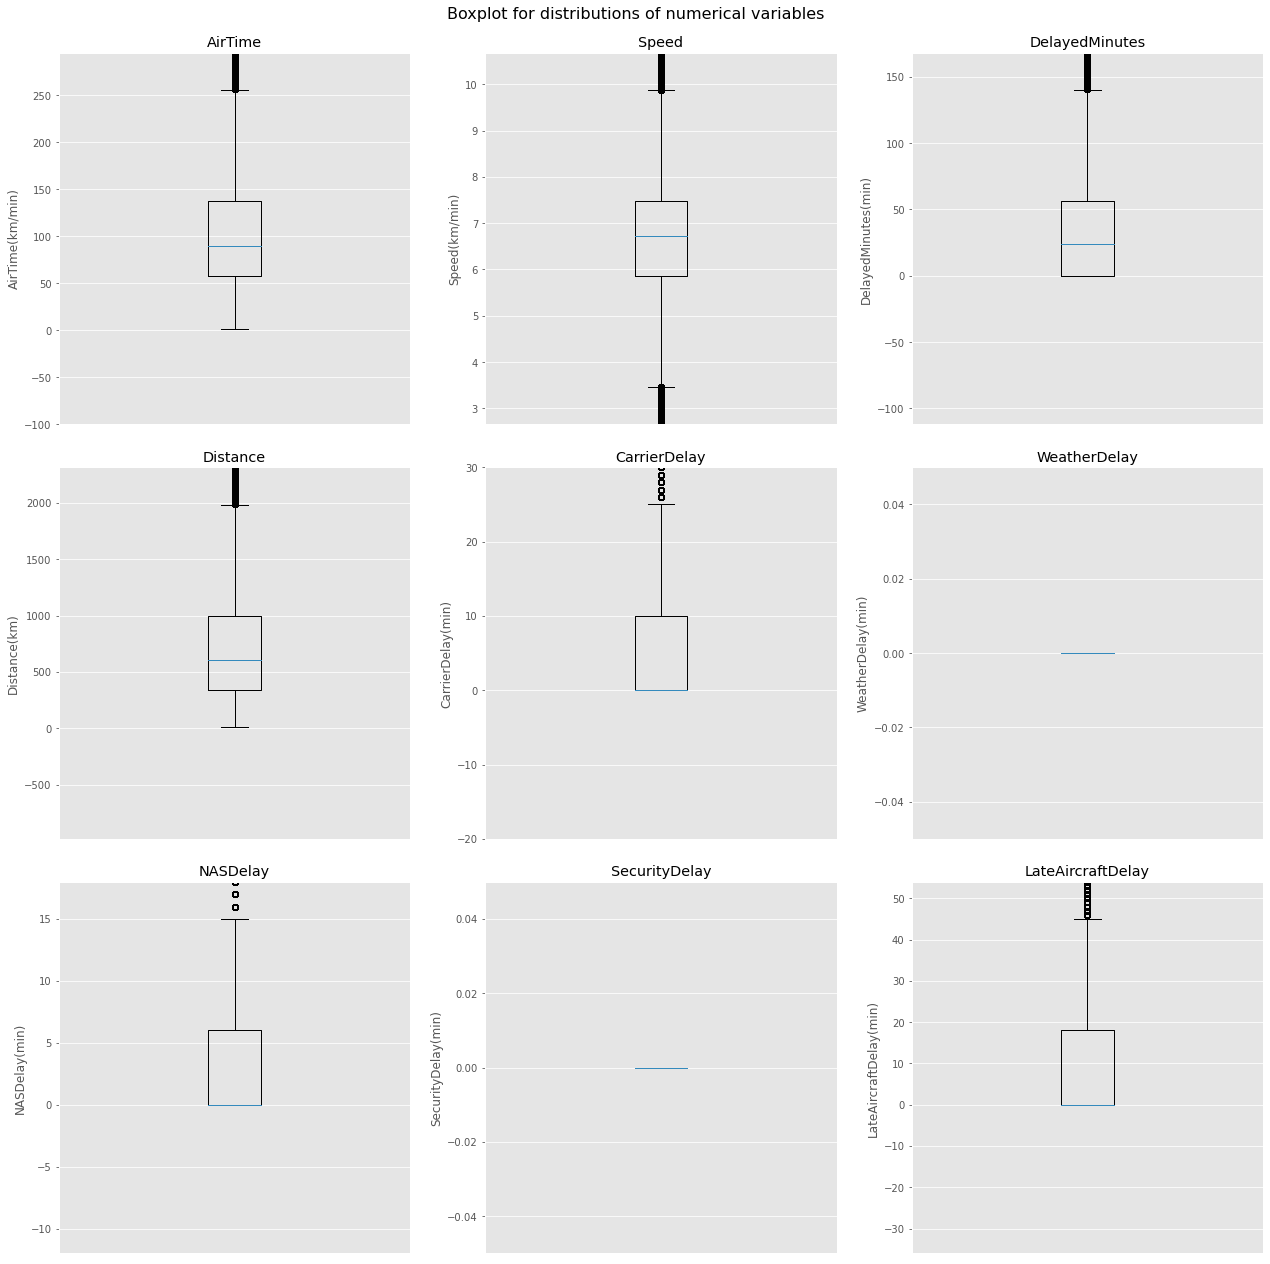

In [16]:
print(df.describe())

plt.style.use('ggplot')
fig, axs = plt.subplots(ncols = 3, nrows =3, figsize = (18,18))

labels = list(df.columns)

fig.suptitle('Boxplot for distributions of numerical variables', fontsize = 16)

boxplotGrid( df.select_dtypes(include = 'number'), axs)
plt.tight_layout(pad = 2)

Is any of the quantitative data correlated?

In [17]:
#For Heatmaps, the seaborn.heatmap is nicely done. Also, it is an axes level function, so I can pass the ax of matplotlib.

def corrHeatMap(corrMat, ax):
    
    mask = np.triu(corrMat, 1)
    sns.heatmap(corrMat, annot = True, linewidths = 1, mask = mask,
            annot_kws={"size": 10}, cmap = 'Greens', ax = ax)
    ax.set_title('Correlation Matrix Delayed Flights')    
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

                    AirTime     Speed  DelayedMinutes  Distance  CarrierDelay  \
AirTime            1.000000  0.435626        0.010095  0.980297      0.010826   
Speed              0.435626  1.000000       -0.081298  0.523510     -0.010737   
DelayedMinutes     0.010095 -0.081298        1.000000 -0.018701      0.545347   
Distance           0.980297  0.523510       -0.018701  1.000000      0.007620   
CarrierDelay       0.010826 -0.010737        0.545347  0.007620      1.000000   
WeatherDelay      -0.016280 -0.034639        0.277239 -0.024186     -0.040568   
NASDelay           0.044198 -0.107392        0.452917 -0.000333     -0.047226   
SecurityDelay      0.005266 -0.000887        0.011670  0.004050     -0.011225   
LateAircraftDelay -0.022233 -0.018680        0.559861 -0.026354     -0.077199   

                   WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
AirTime               -0.016280  0.044198       0.005266          -0.022233  
Speed                 -0.034639 -

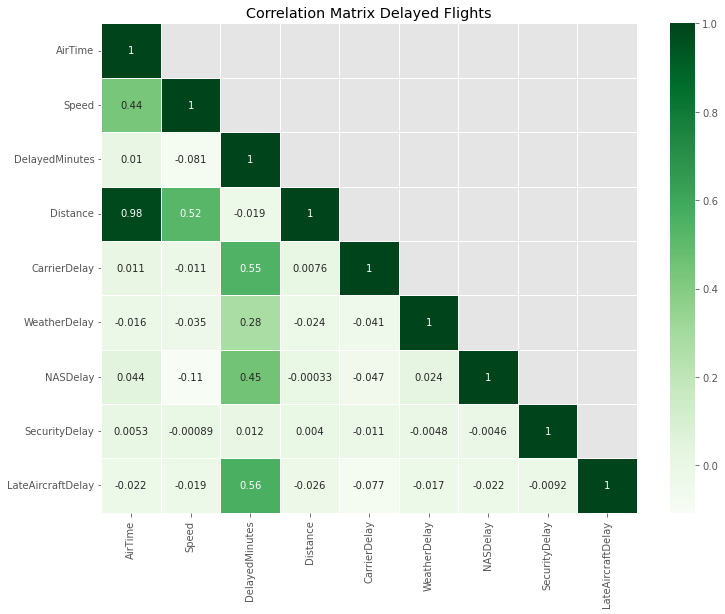

In [18]:
corrMat = df.corr()
fig, ax = plt.subplots(figsize = (12,9))

corrHeatMap( corrMat, ax)

print(corrMat)

### Statistical summary of delayed flights

            AirTime         Speed  DelayedMinutes      Distance  CarrierDelay  \
count  1.215007e+06  1.215007e+06    1.215007e+06  1.215007e+06  1.215007e+06   
mean   1.075341e+02  6.465748e+00    6.458181e+01  7.419556e+02  1.952062e+01   
std    6.820599e+01  1.516042e+00    6.103865e+01  5.593313e+02  4.406180e+01   
min    1.000000e+00  3.548387e-01    1.600000e+01  1.100000e+01  0.000000e+00   
25%    5.800000e+01  5.705882e+00    2.700000e+01  3.340000e+02  0.000000e+00   
50%    9.000000e+01  6.584906e+00    4.400000e+01  5.950000e+02  2.000000e+00   
75%    1.360000e+02  7.335106e+00    8.000000e+01  9.720000e+02  2.200000e+01   
max    1.091000e+03  7.100000e+02    2.461000e+03  4.962000e+03  2.436000e+03   

       WeatherDelay      NASDelay  SecurityDelay  LateAircraftDelay  
count  1.215007e+06  1.215007e+06   1.215007e+06       1.215007e+06  
mean   3.791184e+00  1.535759e+01   8.982417e-02       2.582260e+01  
std    2.176812e+01  3.421257e+01   2.041624e+00       4.247

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  app.launch_new_instance()


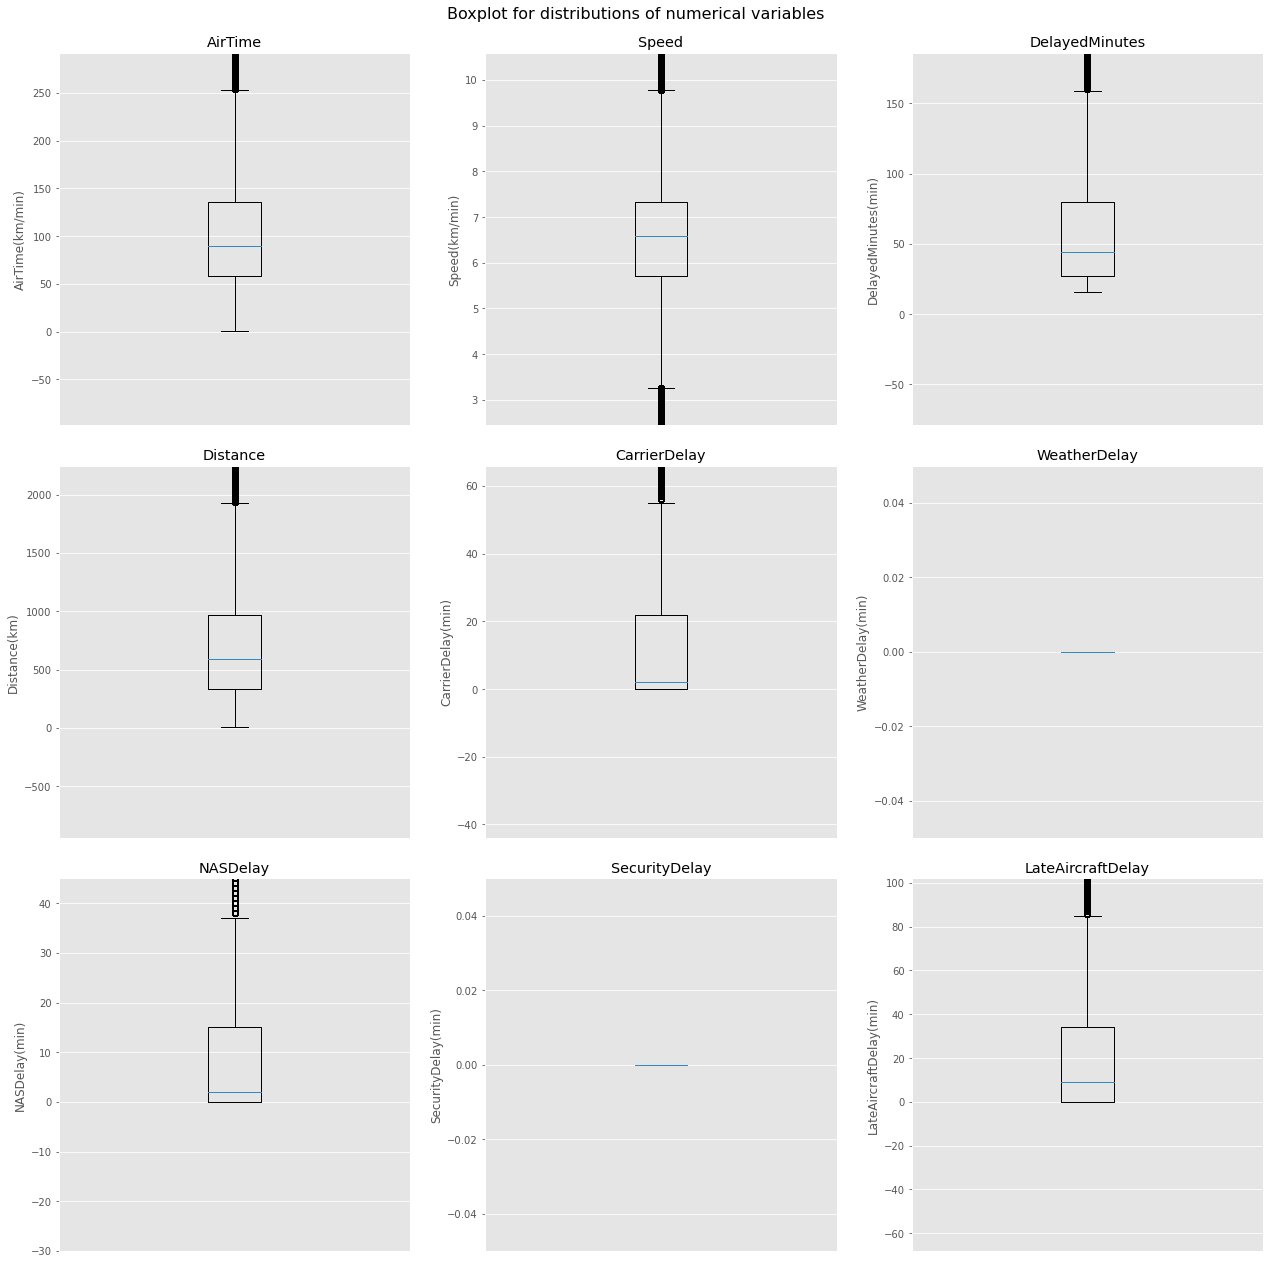

In [19]:
delayedDf = df[df['DelayedMinutes']>0]
print(delayedDf.describe())

fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (18,18))

labels = list(delayedDf.columns)

fig.suptitle('Boxplot for distributions of numerical variables', fontsize = 16)

boxplotGrid( delayedDf.select_dtypes(include = 'number'), axs)
plt.tight_layout(pad = 2)


What about correlation in this subset?

                    AirTime     Speed  DelayedMinutes  Distance  CarrierDelay  \
AirTime            1.000000  0.451314        0.026752  0.978121      0.019192   
Speed              0.451314  1.000000       -0.025792  0.554858      0.028708   
DelayedMinutes     0.026752 -0.025792        1.000000  0.014750      0.500497   
Distance           0.978121  0.554858        0.014750  1.000000      0.028515   
CarrierDelay       0.019192  0.028708        0.500497  0.028515      1.000000   
WeatherDelay      -0.018798 -0.029758        0.263738 -0.024213     -0.070204   
NASDelay           0.062818 -0.105709        0.383730  0.017931     -0.122744   
SecurityDelay      0.007337  0.003246       -0.002395  0.007212     -0.018396   
LateAircraftDelay -0.022782  0.033395        0.473711 -0.010764     -0.182386   

                   WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
AirTime               -0.018798  0.062818       0.007337          -0.022782  
Speed                 -0.029758 -

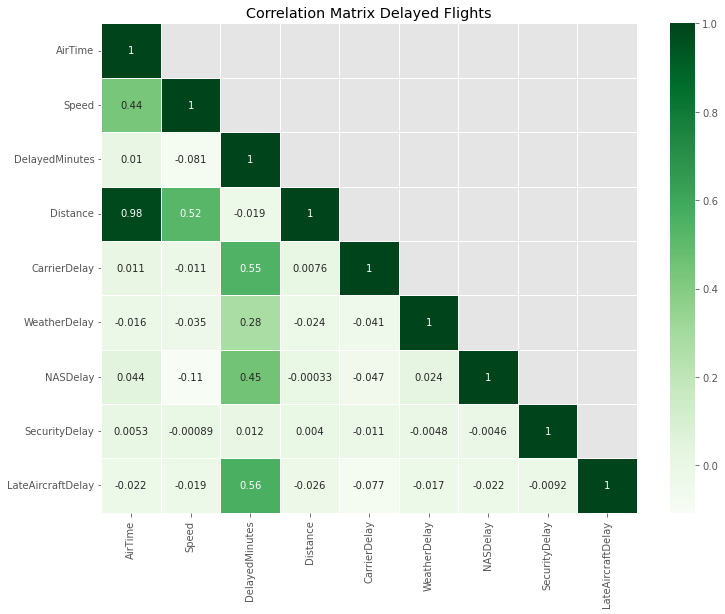

In [20]:
corrMatD = delayedDf.corr()

fig, axs = plt.subplots(figsize = (12,9))
corrHeatMap( corrMat, axs)
print(corrMatD)

Given that both datasets yield similar results, a single analysis will be made.  
With the matrix of correlation, we can see that the variable that has more impact in delays is CarrierDelay with a 0,5 coeficient, followed by LateAirCraftDelay with 0.47. This means that for every minute added to the delay, it is probable that there were minutes added to CarrierDelay or LateAirCraftDelay. Even though, 0,5 is a somewhat weak correlation coeficient, so it is safe to say that the delays are caused by a composition of the variables.  
  
Now, to answer some questions:

In [21]:
#Nested dict to md table. Never more use nested dicts if labels of inner dict are the same. Do it from a dataframe.
def nestedDicToMdTable(dic):
    
    #Start of the table. The first column is void
    md = '| | '

    #writing the keys of outer dic as labels for the columns
    for k in dic.keys():
        md = md+ k +' | '

    #formatting for the first column
    md =md+ '\n|----- | '

    #adding spaces for the rest of the columns
    for i in range(len(dic)):
        md =md+ '-----| '

    #store the inner dictionaries as a list of dictionaries
    valuesList = list(dic.values())
    #get a list of labels for the rows
    labelsList = list(valuesList[0].keys())
    firstLabel = labelsList[0]
    secondLabel = labelsList[1]
    thirdLabel = labelsList[2]
    fourthLabel = labelsList[3]
    fifthLabel = labelsList[4]

    #Store the content of the rows, including the labels, in a nested list
    #if you have 3 different labels, create a list containing 3 lists, if you have 5, a list containing 5...
    rows = [[firstLabel], [secondLabel], [thirdLabel], [fourthLabel], [fifthLabel]] 

    for dik in valuesList:
        #Acces the value in each dictionary and append them in their row as strings
        rows[0].append(str(dik[firstLabel]))
        rows[1].append(str('%.2f' % dik[secondLabel]))
        rows[2].append(str('%.2f' % dik[thirdLabel]))
        rows[3].append(str('%.2f' % dik[fourthLabel]))
        rows[4].append(str('%.2f' % dik[fifthLabel]))
    
    #Finally, write the string
    for r in rows:
        md = md + '\n|'
        for i in r:
            md = md + i + '|'
        
    return md

In [22]:
totalFlights = df.shape[0]
print(totalFlights)
totalDelayed = delayedDf.shape[0]
delayed30 = delayedDf[delayedDf['DelayedMinutes'] > 30].shape[0]
delayed60 = delayedDf[delayedDf['DelayedMinutes'] > 60].shape[0]

print('Number of delayed flights:', totalDelayed, 'precentage of',  '%.2f' % (totalDelayed*100/totalFlights), '%')
print('Number of delayed flights over 30 minutes:',  delayed30, 'percentage of',  '%.2f' % (delayed30*100/totalFlights), '%')
print('Number of delayed flights over 60 minutes:',  delayed60, 'percentage of',  '%.2f' % (delayed60*100/totalFlights), '%')

byCarriers = {}

for i in df['UniqueCarrier'].unique():
    
    tempTotal = df[df['UniqueCarrier'] == i]
    tempDelayed = delayedDf[delayedDf['UniqueCarrier'] == i]
    
    totalFlightsCarrier = tempTotal.shape[0]
    
    byCarriers[i]={'total flights' : totalFlightsCarrier,
                   'meanDelay (min)' :  (np.mean(tempTotal['DelayedMinutes'])),
                   'delayed flights (%)' :  (tempDelayed.shape[0]*100/totalFlights),
                   'delayed > 30min (%)' : (tempDelayed[tempDelayed['DelayedMinutes'] > 30].shape[0]*100/totalFlights),
                   'delayed > 60min (%)' : (tempDelayed[tempDelayed['DelayedMinutes'] > 60].shape[0]*100/totalFlights)                   
                }

md = nestedDicToMdTable(byCarriers)

1928364
Number of delayed flights: 1215007 precentage of 63.01 %
Number of delayed flights over 30 minutes: 830476 percentage of 43.07 %
Number of delayed flights over 60 minutes: 439171 percentage of 22.77 %


{{print(md)}}

In [23]:
dfByCarrier = pd.DataFrame.from_dict(byCarriers)
dfByCarrier = dfByCarrier.astype('float32', copy = False) # Change to a more economical memory type

dfByCarrier = dfByCarrier.transpose(copy = False) #Transpose the dataset to better work with it

dfByCarrier['Carrier'] = dfByCarrier.index

print(dfByCarrier.columns)

Index(['total flights', 'meanDelay (min)', 'delayed flights (%)',
       'delayed > 30min (%)', 'delayed > 60min (%)', 'Carrier'],
      dtype='object')


### Pie Chart for delays

1928364


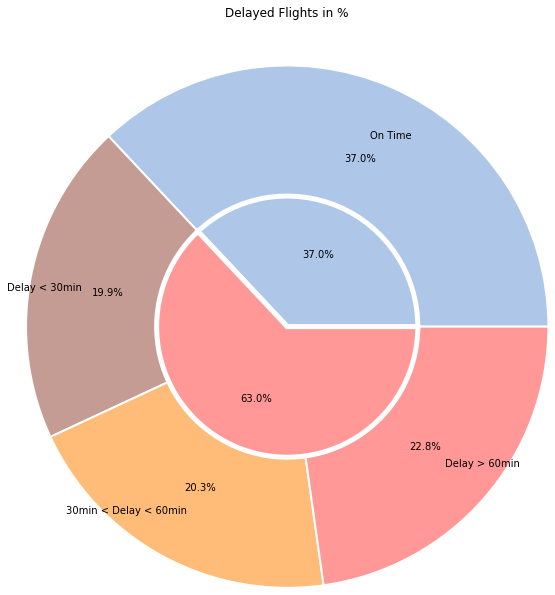

In [24]:
#totalFlights = df.shape[0]
print(totalFlights)
#totalDelayed = delayedDf.shape[0]
#delayed30 = delayedDf[delayedDf['DelayedMinutes'] > 30].shape[0]
#delayed60 = delayedDf[delayedDf['DelayedMinutes'] > 60].shape[0]
delay15_30 = totalDelayed - delayed30
delay30_60 = totalDelayed - delay15_30 - delayed60

size = 1

fig, ax = plt.subplots(figsize=(9,9))

cmap = plt.get_cmap('tab20')

ax.pie([totalFlights - totalDelayed, delay15_30, delay30_60, delayed60],
      labels = ['On Time', 'Delay < 30min', '30min < Delay < 60min', 'Delay > 60min'],autopct='%1.1f%%', 
                labeldistance = 0.8, pctdistance=0.7, colors = cmap([1,11,3,7]),
                rotatelabels = False, radius=2, wedgeprops = dict(edgecolor = 'w', linewidth = 2))

ax.pie([totalFlights - totalDelayed, totalDelayed], colors = cmap([1,7]), autopct='%1.1f%%',
                radius=2-size, wedgeprops = dict(edgecolor = 'w', linewidth = 5))

fig.suptitle('Delayed Flights in %')
fig.tight_layout(pad = 0.5)

The maximum delays are:

In [25]:
companies = list(byCarriers.keys())
totalFlights = []
meanDelay = []
delayed = []
delayed30 = []
delayed60 = []

#Because I used nested dicts, now I have to put everything into lists.
for company in companies:
    totalFlights.append(byCarriers[company]['total flights'])
    meanDelay.append(byCarriers[company]['meanDelay (min)'])
    delayed.append(byCarriers[company]['delayed flights (%)'])
    delayed30.append(byCarriers[company]['delayed > 30min (%)'])
    delayed60.append(byCarriers[company]['delayed > 60min (%)'])

#get the maximum and its index. With that index, get the company in the companies list.
print('Company with most flights:', companies[totalFlights.index(max(totalFlights))], 'with', max(totalFlights),'flights')
print('Company with highest mean delay:', companies[meanDelay.index(max(meanDelay))], 'with', '%.2f' % max(meanDelay),'minutes')
print('Company with highest % delayed flights:', companies[delayed.index(max(delayed))], 'with', '%.2f' % max(delayed),'% of its flights')
print('Company with highest % delayed over 30 min flights:', companies[delayed30.index(max(delayed30))], 'with', '%.2f' % max(delayed30),'% of its flights')
print('Company with highest % delayed over 60 min flights:', companies[delayed60.index(max(delayed60))], 'with', '%.2f' % max(delayed60),'% of its flights')

Company with most flights: WN with 376201 flights
Company with highest mean delay: B6 with 54.53 minutes
Company with highest % delayed flights: WN with 10.19 % of its flights
Company with highest % delayed over 30 min flights: WN with 6.25 % of its flights
Company with highest % delayed over 60 min flights: WN with 2.82 % of its flights


## Exercici 3
Exporta el data set net i amb les noves columnes a Excel.

A typical excel export:
```python
df.to_excel('ExportedDataframe')
```
throws the following error:
```python
This sheet is too large! Your sheet size is: 1928364, 11 Max sheet size is: 1048576, 16384
```
so I'll export as csv

In [26]:
df.to_csv('exportedDataframe.csv')

#### Some other plots of interest
<img src = "1cat.png"/>

![img2](1numNoTails.png 'Histogram of delays minus large tailing')

![img3](1num1catBoxPlot.png 'Distribution of total delays by Carrier (BoxPlot)')

![img4](2numKde.png)

![img3](1num1catKdeGrid.png 'Distribution of total delays by Carrier (Kde Grid)')

![img6](2numHexbin.png)

![img7](2num1catHexbinGrid.png)

![img8](CorrelogramGrid.png)

![img10](Ridge_Plot.png)